# Data-Driven Decision Making  
Prof. Marcelo Olivares  
Prof Ayudante Ian Malgarini

## Integrantes

* Claudia Torres: 18.015.624-0
* Juan Ernesto Sepulveda: 9.672.197-8
* Matías Cifuentes: 18.176.668-9
* Felipe del Río: 21.296.000-4


Assignment 2 Fecha de Entrega 15 de Enero.

### Pregunta 1 – Sistema de Recomendación

1. Analice el dataset e indique algunos estadísticos  descriptivos (numero de canciones,
valores promedio de los atributos para cada canción, entre otros).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [ ]:
# For Google Drive

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_id ='1UW1vw1DC5jAYCsAT5EiT4_2FtKsE_zSm'
link = 'https://drive.google.com/uc?id='+file_id
df = pd.read_csv(link, delimiter=",", index_col=0)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
print(f"El Numero de canciones del DataFrame: {len(df)}")

El Numero de canciones del DataFrame: 114000


In [ ]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000




Una breve descripción de las variables:

* Unnamed: Parece ser un índice.
* track_id: ID único de la pista.
* artists: Artista(s) de la pista.
* album_name: Nombre del álbum.
* track_name: Nombre de la pista.
* popularity: Popularidad de la pista (escala de 0 a 100).
* duration_ms: Duración de la pista en milisegundos.
* explicit: Si la pista es explícita (True/False).
* danceability: Medida de qué tan bailable es la pista.
* energy: Medida de energía de la pista.
* key: Clave musical en la que está la pista.
* loudness: Volumen de la pista.
* mode: Modo musical de la pista.
* speechiness: Presencia de palabras habladas.
* acousticness: Medida de acusticidad.
* instrumentalness: Presencia de instrumentos musicales.
* liveness: Presencia de audiencia en vivo.
* valence: Medida de positividad musical.
* tempo: Tempo de la pista en BPM.
* time_signature: Compás de la pista.
* track_genre: Género de la pista.


Estadísticas Resumidas:

* Cantidad de pistas: 114,000.
* Popularidad: Varía de 0 a 100, con una media de 41.56.
* Duración: Rango desde 15,928 ms hasta 5,237,295 ms, con una media de 219,377 ms.


Danceability, Energy, Loudness, etc.: Estas características tienen rangos diferentes, pero proporcionan una medida cuantitativa de las características musicales.

**Observaciones generales**

Los datos parecen estar bien estructurados con medidas cuantitativas y cualitativas.

Las características como danceability, energy, loudness, etc., son probablemente valores normalizados que indican las características de la pista.

Podrían existir repeticiones en el track_id, el nombre de la canción y del artista, las que chequeamos a continuación

In [ ]:
# Check for duplicate track_ids
duplicate_track_ids = df['track_id'].duplicated().sum()
duplicate_track_ids


24259

In [ ]:
# Group by track_id and see the characteristics of the duplicate entries
grouped_by_track_id = df[df['track_id'].duplicated(keep=False)].groupby('track_id').agg(['nunique', 'count'])
grouped_by_track_id.head()


artists       album_name       track_name        \
                       nunique count    nunique count    nunique count   
track_id                                                                 
001APMDOl3qtx1526T11n1       1     2          1     2          1     2   
001YQlnDSduXd5LgBd66gT       1     2          1     2          1     2   
003vvx7Niy0yvhvHt4a68B       1     3          1     3          1     3   
004h8smbIoAkUNDJvVKwkG       1     2          1     2          1     2   
006rHBBNLJMpQs8fRC2GDe       1     3          1     3          1     3   

                       popularity       duration_ms        ... liveness        \
                          nunique count     nunique count  ...  nunique count   
track_id                                                   ...                  
001APMDOl3qtx1526T11n1          1     2           1     2  ...        1     2   
001YQlnDSduXd5LgBd66gT          1     2           1     2  ...        1     2   
003vvx7Niy0yvhvHt4a68B          1     3           1     3  ...        1     3   
004h8smbIoAkUNDJvVKwkG          1     2           1     2  ...        1     2   
006rHBBNLJMpQs8fRC2GDe          1     3           1     3  ...        1     3   

                       valence         tempo       time_signature        \
                       nunique count nunique count        nunique count   
track_id                                                                  
001APMDOl3qtx1526T11n1       1     2       1     2              1     2   
001YQlnDSduXd5LgBd66gT       1     2       1     2              1     2   
003vvx7Niy0yvhvHt4a68B       1     3       1     3              1     3   
004h8smbIoAkUNDJvVKwkG       1     2       1     2              1     2   
006rHBBNLJMpQs8fRC2GDe       1     3       1     3              1     3   

                       track_genre        
                           nunique count  
track_id                                  
001APMDOl3qtx1526T11n1           2     2  
001YQlnDSduXd5LgBd66gT           2     2  
003vvx7Niy0yvhvHt4a68B           3     3  
004h8smbIoAkUNDJvVKwkG           2     2  
006rHBBNLJMpQs8fRC2GDe           3     3  

[5 rows x 38 columns]


Hay 24,259 track_id repetidos en el conjunto de datos. Esto significa que algunas pistas aparecen más de una vez en los datos.

* Cada track_id duplicado aparece varias veces (columna "count").
* La mayoría de las características (como artistas, nombre del álbum, nombre de la pista, popularidad, duración, etc.) son únicas para un mismo track_id. Esto sugiere que, aunque el track_id es el mismo, otros atributos varían.
* Algunas características, como el género de la pista (track_genre), muestran variaciones incluso dentro del mismo track_id.

In [ ]:
# Selecting a few duplicated track_ids to examine in detail
sample_duplicated_track_ids = df[df['track_id'].duplicated(keep=False)]['track_id'].unique()[:5]
detailed_examples = df[df['track_id'].isin(sample_duplicated_track_ids)]

# Display the detailed information for these selected track_ids
detailed_examples.sort_values(by='track_id')


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
56777,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,indie-pop
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
91904,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,rock
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
15190,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,chill
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
62102,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,j-pop
99152,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,singer-songwriter
102151,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,songwriter



Al examinar algunos ejemplos de track_id duplicados, encontramos lo siguiente:
##### ***Mismos Atributos con Diferencias en el Género***:

Por ejemplo, el track_id "01MVOl9KtVTNfFiBU9I7dc" corresponde a la pista "Days I Will Remember" de Tyrone Wells. Aunque la mayoría de los atributos son idénticos (artista, nombre del álbum, nombre de la pista, popularidad, etc.), el género varía entre "acoustic" e "indie-pop".


##### ***Consistencia en Artistas y Álbumes***:

En todos los ejemplos, los artistas y nombres de álbumes son consistentes para un mismo track_id, lo que sugiere que estas pistas son efectivamente la misma canción, posiblemente listada bajo diferentes géneros o en diferentes contextos dentro de Spotify.


##### ***Atributos Musicales Iguales***:

Las características musicales como la duración, la bailableidad, la energía, la acústica, etc., son idénticas para los duplicados, reforzando la idea de que son la misma pista.


##### ***Interpretación:***

Las repeticiones parecen deberse a que las mismas pistas se encuentran listadas bajo diferentes géneros o contextos en Spotify. Esto puede ser una característica de cómo Spotify categoriza sus pistas, permitiendo que una canción aparezca en múltiples géneros o listas de reproducción.


##### ***Acciones a seguir***:

Se necesita generar un data set que contenga los diferentes genereros que tienen las canciones que pueden ser mas de uno, por lo cual se realiza un division de la columna Genero en varias columnas dummies para posteriormente agrupar las canciones iguales y solo tener valores unicos con todas las variables de genero, eliminando al mismo tiempo los valores de track_id repetidos.

In [ ]:
df = pd.get_dummies(df, columns=['track_genre'])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0,0,0,0,0,0,0,0,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0,0,0,0,0,0,0,0,0,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0,0,0,0,0,0,0,0,0,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0,0,0,0,0,0,0,0,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,0,0,0,0,0,0,0,0,0,1
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0,0,0,0,0,0,0,0,1
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0,0,0,0,0,0,0,0,1
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
listado_columnas = df.columns.tolist()
print(listado_columnas)

['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_elec

In [ ]:
import pandas as pd

# Suponiendo que df_group es el DataFrame agrupado por 'track_id'
df_group = df.groupby('track_id').sum()

# Cambiar valores de las columnas de track_genre a 1 o 0
columns_to_binarize = ['track_genre_acoustic', 'track_genre_afrobeat', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_anime', 'track_genre_black-metal', 'track_genre_bluegrass', 'track_genre_blues', 'track_genre_brazil', 'track_genre_breakbeat', 'track_genre_british', 'track_genre_cantopop', 'track_genre_chicago-house', 'track_genre_children', 'track_genre_chill', 'track_genre_classical', 'track_genre_club', 'track_genre_comedy', 'track_genre_country', 'track_genre_dance', 'track_genre_dancehall', 'track_genre_death-metal', 'track_genre_deep-house', 'track_genre_detroit-techno', 'track_genre_disco', 'track_genre_disney', 'track_genre_drum-and-bass', 'track_genre_dub', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 'track_genre_emo', 'track_genre_folk', 'track_genre_forro', 'track_genre_french', 'track_genre_funk', 'track_genre_garage', 'track_genre_german', 'track_genre_gospel', 'track_genre_goth', 'track_genre_grindcore', 'track_genre_groove', 'track_genre_grunge', 'track_genre_guitar', 'track_genre_happy', 'track_genre_hard-rock', 'track_genre_hardcore', 'track_genre_hardstyle', 'track_genre_heavy-metal', 'track_genre_hip-hop', 'track_genre_honky-tonk', 'track_genre_house', 'track_genre_idm', 'track_genre_indian', 'track_genre_indie', 'track_genre_indie-pop', 'track_genre_industrial', 'track_genre_iranian', 'track_genre_j-dance', 'track_genre_j-idol', 'track_genre_j-pop', 'track_genre_j-rock', 'track_genre_jazz', 'track_genre_k-pop', 'track_genre_kids', 'track_genre_latin', 'track_genre_latino', 'track_genre_malay', 'track_genre_mandopop', 'track_genre_metal', 'track_genre_metalcore', 'track_genre_minimal-techno', 'track_genre_mpb', 'track_genre_new-age', 'track_genre_opera', 'track_genre_pagode', 'track_genre_party', 'track_genre_piano', 'track_genre_pop', 'track_genre_pop-film', 'track_genre_power-pop', 'track_genre_progressive-house', 'track_genre_psych-rock', 'track_genre_punk', 'track_genre_punk-rock', 'track_genre_r-n-b', 'track_genre_reggae', 'track_genre_reggaeton', 'track_genre_rock', 'track_genre_rock-n-roll', 'track_genre_rockabilly', 'track_genre_romance', 'track_genre_sad', 'track_genre_salsa', 'track_genre_samba', 'track_genre_sertanejo', 'track_genre_show-tunes', 'track_genre_singer-songwriter', 'track_genre_ska', 'track_genre_sleep', 'track_genre_songwriter', 'track_genre_soul', 'track_genre_spanish', 'track_genre_study', 'track_genre_swedish', 'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno', 'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish', 'track_genre_world-music']


# Iterar sobre las columnas y aplicar la binarización
for column in columns_to_binarize:
    df_group[column] = df_group[column].apply(lambda x: 1 if x != 0 else 0)

# Crear un diccionario con tuplas (artists, album_name, track_name)
df_dict = dict(zip(df_group.index, zip(df['artists'], df['album_name'], df['track_name'])))

# Crear un nuevo DataFrame a partir del diccionario
df_info = pd.DataFrame(list(df_dict.values()), index=df_dict.keys(), columns=['artists', 'album_name', 'track_name'])

# Fusionar los DataFrames df_group y df_info
df_group = pd.concat([df_group, df_info], axis=1)

# Restaurar 'track_id' como una columna
df_group.reset_index(inplace=True)

# Mostrar el DataFrame resultante
df_merge =df_group
df_merge.rename(columns={'index': 'track_id'}, inplace=True)


In [ ]:
df_merge

,track_id,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,artists,album_name,track_name
0,0000vdREvCVMxbQTkS888c,44,160725,1,0.910,0.37400,8,-9.844,0,0.1990,...,0,0,0,0,0,0,0,Gen Hoshino,Comedy,Comedy
1,000CC8EParg64OmTxVnZ0p,47,322933,0,0.269,0.51600,0,-7.361,1,0.0366,...,0,0,0,0,0,0,0,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,000Iz0K615UepwSJ5z2RE5,22,515360,0,0.686,0.56000,5,-13.264,0,0.0462,...,0,0,0,0,0,0,0,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,000RDCYioLteXcutOjeweY,62,190203,0,0.679,0.77000,0,-3.537,1,0.1900,...,0,0,0,0,0,0,0,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,000qpdoc97IMTBvF8gwcpy,19,331240,0,0.519,0.43100,6,-13.606,0,0.0291,...,0,0,0,0,0,0,0,Chord Overstreet,Hold On,Hold On
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89736,7zxHiMmVLt4LGWpOMqOpUh,56,325156,0,0.766,0.38200,7,-11.464,0,0.0324,...,0,0,0,0,0,0,0,Natan & Shander;Feid;Ryan Castro;Totoy El Frio,Noche de Halloween Latino,VIP Feat. Totoy El Frio
89737,7zxpdh3EqMq2JCkOI0EqcG,23,109573,0,0.529,0.00879,10,-32.266,1,0.0587,...,0,0,0,0,0,0,0,Kenia OS,En Vivo (Acústico),Sirena (Versión Acústica)
89738,7zyYmIdjqqiX6kLryb7QBx,61,260573,0,0.423,0.36000,3,-9.458,1,0.0372,...,0,0,0,0,0,0,0,Jerry Di;Zion & Lennox;Lyanno;Noriel;Luis Albe...,Homecoming Latin Party,Verano En París - Remix
89739,7zybSU9tFO9HNlwmGF7stc,54,234300,0,0.649,0.83400,10,-11.430,0,0.0397,...,0,0,0,0,0,0,0,Farina,Halloween 2022 Perreo Vol. 4,Mucho Pa Ti


### 2. Utilice k-NN para encontrar similitudes entre canciones. Especifique la métrica de distancia que utilizó.

Para utilizar k-Nearest Neighbors (k-NN) con el objetivo de encontrar similitudes entre canciones del datos, primero necesitas seleccionar una métrica de distancia adecuada. La elección de la métrica de distancia depende de la naturaleza de los datos y del tipo de similitudes que se busca identificar. Algunas de las métricas de distancia más comunes utilizadas en k-NN:

Distancia Euclidiana: Es la más común y se utiliza para espacios de características numéricas. Funciona bien si todas las características tienen la misma escala.

Distancia de Manhattan (City Block): Útil cuando la diferencia en magnitud entre las características es importante.

Distancia de Minkowski: Generalización de las distancias Euclidiana y de Manhattan. Puede ser ajustada para diferentes tipos de relaciones espaciales.

Distancia de Coseno: Mide el ángulo entre dos vectores en un espacio multidimensional. Es útil cuando la magnitud de los vectores no es importante, sino su dirección (o orientación).

***Decidir la Mejor Métrica:***

Dado que los datos tienen características con diferentes escalas o unidades, las distancias Euclidiana o de Manhattan podrían no ser adecuadas sin una normalización previa.

La mejor manera de elegir una métrica es experimentar con diferentes opciones y ver cuál ofrece el mejor resultado en el contexto del problema analizado.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import NearestNeighbors

# Supongamos que 'df' es tu DataFrame

# Divide las columnas en numéricas y categóricas
numeric_features = df_merge.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df_merge.select_dtypes(include=['object']).columns

# Define los pasos de preprocesamiento para columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Puedes ajustar la estrategia de imputación según tus necesidades
    ('scaler', StandardScaler())
])

# Define los pasos de preprocesamiento para columnas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Puedes ajustar la estrategia de imputación según tus necesidades
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combina los pasos de preprocesamiento en un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Construye el pipeline completo con preprocesamiento y modelo KNN
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('knn', NearestNeighbors(n_neighbors=11, metric='euclidean'))])

# Ajusta el modelo al DataFrame
pipeline.fit(df_merge)

# Puedes utilizar el modelo para predecir o realizar otras operaciones según tus necesidades


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_syn...
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=129)),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['track_id', 'artists', 'album_name', 'track_name'], dtype='object'))])),
                ('knn', NearestNeighbors(metric='euclidean', n_neighbors=11))])

In [ ]:
# Supongamos que 'df_merge' es tu DataFrame combinado y 'pipeline' es el objeto que construiste

# Almacena temporalmente las columnas 'track_id' y 'track_name'
columnas_temporales = df_merge[['track_id', 'track_name', 'artists', 'album_name']]

# Elimina las columnas 'track_id' y 'track_name' para ajustar el modelo
df_entrenamiento = df_merge.drop(['track_id', 'track_name', 'artists', 'album_name'], axis=1)

# Ajusta el modelo KNN
pipeline.named_steps['knn'].fit(df_entrenamiento)

# Selecciona la canción de referencia (canción 0 en este caso)
cancion_referencia = df_entrenamiento.iloc[[0]]

# Utiliza el modelo para transformar y predecir
distancias, indices_cercanos = pipeline.named_steps['knn'].kneighbors(cancion_referencia)

# Recupera las columnas 'track_id' y 'track_name' para el resultado
canciones_cercanas = df_merge.iloc[indices_cercanos[0]]

# Añade las columnas 'track_id' y 'track_name' al DataFrame resultante
df_result = pd.DataFrame(canciones_cercanas)
df_result[['track_id', 'track_name', 'artists', 'album_name']] = columnas_temporales.iloc[indices_cercanos[0]][['track_id', 'track_name', 'artists', 'album_name']]

# Añade la columna 'distancia' al DataFrame resultante
df_result['distancia'] = distancias[0]

df_result_subset = df_result[['track_id', 'track_name', 'artists', 'album_name']]

# Imprime el DataFrame resultante
df_result_subset



,track_id,track_name,artists,album_name
0,0000vdREvCVMxbQTkS888c,Comedy,Gen Hoshino,Comedy
61883,5Nt1fjQVCtqUiuZUj7Fo9o,ここがロドスだ、ここで跳べ! (東李苑、穴井千尋、生駒里奈、入山杏奈、加藤玲奈、児玉遥、篠崎...,AKB48,ここがロドスだ、ここで跳べ!<Type A>【初回限定盤】
8005,0hOW6iNtMXxl9UB70gt8Bc,I'm Dangerous,The EverLove,Walk Through Fire
64328,5aydqaKSzdsbib2g0ZFgAL,Deck The Halls - Remastered 1999,Nat King Cole,60s Christmas Party
3162,0HJ7K7uauPS05UqWUkIxGM,abcdefu,GAYLE,Baddest of Them All
23002,1zzsrJb2btZVV6EoBP2frT,Ferrari,James Hype;Miggy Dela Rosa,Ferrari
83219,7Dk8r4VR5NoveUvTiCKEXC,Get in Trouble (So What),Dimitri Vegas & Like Mike;Vini Vici;Dimitri Vegas,Get in Trouble (So What)
33638,2v9mhshNkMH1bc16GPgHt2,Euforie,Totally Nothin,Euforie
60696,5HaRoqxb0Y4aMW347qhTPG,Worldboss (feat. Lisa Mercedes & Redboom) [Dons],Vybz Kartel;Lisa Mercedez;Redboom,Of Dons & Divas
17176,1UDkdgDCZtQBFCCHmurqFU,Post Human,Lucille Croft,Patient X



3. Cada miembro del grupo escoge una canción que le parezca interesante y desea evaluar
que tan probable es que sea de su agrado. Cada alumno del grupo realiza lo siguiente.


- a. Para la canción seleccionada, encuentre las 10 canciones mas cercanas a esa
canción.

- b. Evalue con nota de 1 a 5 esas diez canciones, donde 5 es mayor agrado y 1
mayor desagrado. Si no conoce la canción, escúchela antes de evaluarla o déjela
en blanco.

- c. En base a las canciones evaluados, realice una predicción de rating para la
canción seleccionada.

- d. Escuche la canción y evalúe la calidad de la predicción realizada por el modelo.

## Felipe

In [ ]:
nombre_cancion = "Turn me on"  # Reemplaza con el nombre de la canción que estás buscando

# Verifica si la canción está presente en el DataFrame
if nombre_cancion in df_merge['track_name'].values:
    # Obtiene el índice de la canción en el DataFrame
    indice_cancion = df_merge[df_merge['track_name'] == nombre_cancion].index[0]
    print(f"El índice de la canción '{nombre_cancion}' es: {indice_cancion}")
else:
    print(f"La canción '{nombre_cancion}' no está presente en el DataFrame.")


El índice de la canción 'Turn me on' es: 61102


In [ ]:
# Almacena temporalmente las columnas 'track_id' y 'track_name'
columnas_temporales = df_merge[['track_id', 'track_name', 'artists', 'album_name']]

# Elimina las columnas 'track_id' y 'track_name' para ajustar el modelo
df_entrenamiento = df_merge.drop(['track_id', 'track_name', 'artists', 'album_name'], axis=1)

# Ajusta el modelo KNN
pipeline.named_steps['knn'].fit(df_entrenamiento)

# Selecciona la canción de referencia (canción 0 en este caso)
cancion_referencia = df_entrenamiento.iloc[[indice_cancion]]

# Utiliza el modelo para transformar y predecir
distancias, indices_cercanos = pipeline.named_steps['knn'].kneighbors(cancion_referencia)

# Recupera las columnas 'track_id' y 'track_name' para el resultado
canciones_cercanas = df_merge.iloc[indices_cercanos[0]]

# Añade las columnas 'track_id' y 'track_name' al DataFrame resultante
df_result = pd.DataFrame(canciones_cercanas)
df_result[['track_id', 'track_name', 'artists', 'album_name']] = columnas_temporales.iloc[indices_cercanos[0]][['track_id', 'track_name', 'artists', 'album_name']]

# Añade la columna 'distancia' al DataFrame resultante
df_result['distancia'] = distancias[0]

df_result_subset = df_result[['track_id', 'track_name', 'artists','album_name', 'distancia']]

# Imprime el DataFrame resultante
df_result_subset

,track_id,track_name,artists,album_name,distancia
61102,5JbSsLIOLzBVDujhtDguuZ,Turn me on,BAND-MAID,WORLD DOMINATION,0.000000
6891,0bMix7R4TTynKLTI6vDPuJ,The Dark One,Unleashed,Where No Life Dwells,22.799925
21985,1ur6VuO16RCMIfmDbep4VT,Mother in Law,Vybz Kartel,Pon Di Gaza 2.0,27.295571
20569,1nFOJgG3b6YRrN9Vm6BkMP,Please Me,Cardi B;Bruno Mars,New RnB,30.437110
3265,0HkwDCJIbWijtfKg63gQBJ,Feel Invincible,Skillet,Unleashed,32.283471
85357,7cEYCs44J2ATKFGhccGvWO,Dale Luz Al Instante,Luis Alberto Spinetta,Pan,32.473249
76412,6dSVppeLhFIN2tZaOSjCH1,D'Oreste D'Adjace,Aesma Daeva,Dawn of the New Athens,34.794572
86522,7iHpKByljSDtrWEirFfBQ5,Para Pau,GIT,Distorsion,36.980493
70835,69mAhvOXSSpKRSYFtdWpE4,思念總在分手後,潘安邦,校園民歌05,37.751117
16405,1Q7OXxsTM8aUaZ3BbPfIDb,Stotra - Bhawani Shankarau Vande,Veena Sahasrabuddhe,Mahamrityunjaya Shiva - Sacred Morning Mantras,37.909720


In [ ]:
# Vamos a crear una lista vacía para almacenar las calificaciones
ratings = []

# Iterar sobre cada canción en el dataframe
for index, row in df_result_subset.iterrows():
    print(f"Canción: {row['track_name']} por {row['artists']}")

    # Vamos a calificar las canciones
    rating = input("Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: ")

    # Validamos que esté correcta la entrada
    if rating.isdigit() and 1 <= int(rating) <= 5:
        ratings.append(int(rating))
    else:
        ratings.append(None)  # Para las canciones no calificadas

# Agregamos las calificaciones al dataframe
df_result_subset['Rating'] = ratings

# Hacemos un print del DataFrame con las calificaciones
print(df_result_subset[['track_name', 'artists', 'Rating']])

# Crear un diccionario con track_id y calificaciones
track_id_ratings_dict = {}

# Iterar sobre cada canción en df_result_subset, excluyendo la primera canción
for index, row in df_result_subset.iloc[1:].iterrows():
    track_id_ratings_dict[row['track_id']] = row['Rating']

# Imprimir el diccionario resultante
print(track_id_ratings_dict)

Canción: Turn me on por BAND-MAID
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 
Canción: The Dark One por Unleashed
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: Mother in Law por Vybz Kartel
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 3
Canción: Please Me por Cardi B;Bruno Mars
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 4
Canción: Feel Invincible por Skillet
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 5
Canción: Dale Luz Al Instante por Luis Alberto Spinetta
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 4
Canción: D'Oreste D'Adjace por Aesma Daeva
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 3
Canción: Para Pau por GIT
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 3
Canción: 思念總在分手後 por 潘安邦
Ingresa tu calificación de 1 a 

In [ ]:
# Extraemos las calificaciones de las canciones más cercanas
nearest_songs_ratings = [track_id_ratings_dict.get(row['track_id']) for _, row in df_result_subset.iterrows()]

# Filtramos las calificaciones no nulas y las distancias correspondientes
filtered_ratings = [(rating, distancias[0][i]) for i, rating in enumerate(nearest_songs_ratings) if rating is not None]

# Si no hay calificaciones para hacer la predicción, devuelve None
if not filtered_ratings:
    predicted_rating = None
else:
    # Desempaqueta las calificaciones y las distancias
    ratings, dists = zip(*filtered_ratings)

    # Calcula el promedio ponderado (la ponderación es la inversa de la distancia)
    weights = 1 / np.array(dists)
    predicted_rating = np.average(ratings, weights=weights)

print(f"Calificación predicha: {round(predicted_rating)}")


Calificación predicha: 3


- Escuche la canción y evalúe la calidad de la predicción realizada por el modelo.

**Respuesta:**
Felipe : Me gusta en cierta manera pero siendo estricto hubiera evaluado con un 4


## Juan Ernesto


In [ ]:
nombre_cancion = "Master Of Puppets"  # Reemplaza con el nombre de la canción que estás buscando

# Verifica si la canción está presente en el DataFrame
if nombre_cancion in df_merge['track_name'].values:
    # Obtiene el índice de la canción en el DataFrame
    indice_cancion = df_merge[df_merge['track_name'] == nombre_cancion].index[0]
    print(f"El índice de la canción '{nombre_cancion}' es: {indice_cancion}")
else:
    print(f"La canción '{nombre_cancion}' no está presente en el DataFrame.")

El índice de la canción 'Master Of Puppets' es: 47013


In [ ]:
# Almacena temporalmente las columnas 'track_id' y 'track_name'
columnas_temporales = df_merge[['track_id', 'track_name', 'artists', 'album_name']]

# Elimina las columnas 'track_id' y 'track_name' para ajustar el modelo
df_entrenamiento = df_merge.drop(['track_id', 'track_name', 'artists', 'album_name'], axis=1)

# Ajusta el modelo KNN
pipeline.named_steps['knn'].fit(df_entrenamiento)

# Selecciona la canción de referencia (canción 0 en este caso)
cancion_referencia = df_entrenamiento.iloc[[indice_cancion]]

# Utiliza el modelo para transformar y predecir
distancias, indices_cercanos = pipeline.named_steps['knn'].kneighbors(cancion_referencia)

# Recupera las columnas 'track_id' y 'track_name' para el resultado
canciones_cercanas = df_merge.iloc[indices_cercanos[0]]

# Añade las columnas 'track_id' y 'track_name' al DataFrame resultante
df_result = pd.DataFrame(canciones_cercanas)
df_result[['track_id', 'track_name', 'artists', 'album_name']] = columnas_temporales.iloc[indices_cercanos[0]][['track_id', 'track_name', 'artists', 'album_name']]

# Añade la columna 'distancia' al DataFrame resultante
df_result['distancia'] = distancias[0]

df_result_subset = df_result[['track_id', 'track_name', 'artists','album_name', 'distancia']]

# Imprime el DataFrame resultante
df_result_subset

,track_id,track_name,artists,album_name,distancia
47013,45T4uUz8dMls9hQ2xLvONF,Master Of Puppets,Metallica,Master Of Puppets (Remastered),0.000000
46010,3zzA325SAVx8AcEvqNUDFM,You're My Angel - Hypnose Remix Edit,Styles & Breeze;Hypnose,You're My Angel,23.080227
85123,7azVJ6AgvPLOum1tppactO,Conto De Fraldas,Tianastacia,Ta Na Boa,23.717675
64217,5aNAawi2jFEe0qGPJSogRp,Rudolph The Red-Nosed Reindeer,Ella Fitzgerald,GOD JUL,34.011434
6555,0ZjTWEc0eU7rm4XvO4coE6,Swan,Body Void,Ruins,35.716187
78045,6mCAfQDPQBnZ3a94oOtKCP,Der Zug hat keine Bremse - Mallorcastyle Edition,Mia Julia;Lorenz Büffel;Malle Anja,Ballermann Hits Party 2023,36.396104
53922,4ga4WvRNhMsIL38pkBbnIN,Mad Love,Mabel,High Expectations,37.805230
8652,0l1Pp67JljnHBeNYzffPkf,Hummingbird,B.B. King;John Mayer,B.B. King & Friends - 80,40.163396
81407,73zEI7VgcQh3c3tfe3Zhxj,Love Me Like You Do,Ellie Goulding,Fifty Shades Freed (Original Motion Picture So...,42.733721
9370,0orC3HuHHSA1EKCKRGYQMh,Onde Está Sua Fé?,Sued Silva,Onde Está Sua Fé?,44.636199


In [ ]:
# Vamos a crear una lista vacía para almacenar las calificaciones
ratings = []

# Iterar sobre cada canción en el dataframe
for index, row in df_result_subset.iterrows():
    print(f"Canción: {row['track_name']} por {row['artists']}")

    # Vamos a calificar las canciones
    rating = input("Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: ")

    # Validamos que esté correcta la entrada
    if rating.isdigit() and 1 <= int(rating) <= 5:
        ratings.append(int(rating))
    else:
        ratings.append(None)  # Para las canciones no calificadas

# Agregamos las calificaciones al dataframe
df_result_subset['Rating'] = ratings

# Hacemos un print del DataFrame con las calificaciones
print(df_result_subset[['track_name', 'artists', 'Rating']])

# Crear un diccionario con track_id y calificaciones
track_id_ratings_dict = {}

# Iterar sobre cada canción en df_result_subset, excluyendo la primera canción
for index, row in df_result_subset.iloc[1:].iterrows():
    track_id_ratings_dict[row['track_id']] = row['Rating']

# Imprimir el diccionario resultante
print(track_id_ratings_dict)

Canción: Master Of Puppets por Metallica
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 
Canción: You're My Angel - Hypnose Remix Edit por Styles & Breeze;Hypnose
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: Conto De Fraldas por Tianastacia
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 3
Canción: Rudolph The Red-Nosed Reindeer por Ella Fitzgerald
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: Swan por Body Void
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 1
Canción: Der Zug hat keine Bremse - Mallorcastyle Edition por Mia Julia;Lorenz Büffel;Malle Anja
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: Mad Love por Mabel
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: Hummingbird por B.B. King;John Mayer
Ingresa tu calificación de 1 a 5

In [ ]:
# Extraemos las calificaciones de las canciones más cercanas
nearest_songs_ratings = [track_id_ratings_dict.get(row['track_id']) for _, row in df_result_subset.iterrows()]

# Filtramos las calificaciones no nulas y las distancias correspondientes
filtered_ratings = [(rating, distancias[0][i]) for i, rating in enumerate(nearest_songs_ratings) if rating is not None]

# Si no hay calificaciones para hacer la predicción, devuelve None
if not filtered_ratings:
    predicted_rating = None
else:
    # Desempaqueta las calificaciones y las distancias
    ratings, dists = zip(*filtered_ratings)

    # Calcula el promedio ponderado (la ponderación es la inversa de la distancia)
    weights = 1 / np.array(dists)
    predicted_rating = np.average(ratings, weights=weights)

print(f"Calificación predicha: {round(predicted_rating)}")

Calificación predicha: 2


Juan Ernesto: No me parecieron las recomendaciones.

## Claudia

In [ ]:
nombre_cancion = "I Won't Give Up"  # Reemplaza con el nombre de la canción que estás buscando

# Verifica si la canción está presente en el DataFrame
if nombre_cancion in df_merge['track_name'].values:
    # Obtiene el índice de la canción en el DataFrame
    indice_cancion = df_merge[df_merge['track_name'] == nombre_cancion].index[0]
    print(f"El índice de la canción '{nombre_cancion}' es: {indice_cancion}")
else:
    print(f"La canción '{nombre_cancion}' no está presente en el DataFrame.")

El índice de la canción 'I Won't Give Up' es: 11


In [ ]:
# Almacena temporalmente las columnas 'track_id' y 'track_name'
columnas_temporales = df_merge[['track_id', 'track_name', 'artists', 'album_name']]

# Elimina las columnas 'track_id' y 'track_name' para ajustar el modelo
df_entrenamiento = df_merge.drop(['track_id', 'track_name', 'artists', 'album_name'], axis=1)

# Ajusta el modelo KNN
pipeline.named_steps['knn'].fit(df_entrenamiento)

# Selecciona la canción de referencia (canción 0 en este caso)
cancion_referencia = df_entrenamiento.iloc[[indice_cancion]]

# Utiliza el modelo para transformar y predecir
distancias, indices_cercanos = pipeline.named_steps['knn'].kneighbors(cancion_referencia)

# Recupera las columnas 'track_id' y 'track_name' para el resultado
canciones_cercanas = df_merge.iloc[indices_cercanos[0]]

# Añade las columnas 'track_id' y 'track_name' al DataFrame resultante
df_result = pd.DataFrame(canciones_cercanas)
df_result[['track_id', 'track_name', 'artists', 'album_name']] = columnas_temporales.iloc[indices_cercanos[0]][['track_id', 'track_name', 'artists', 'album_name']]

# Añade la columna 'distancia' al DataFrame resultante
df_result['distancia'] = distancias[0]

df_result_subset = df_result[['track_id', 'track_name', 'artists','album_name', 'distancia']]

# Imprime el DataFrame resultante
df_result_subset

,track_id,track_name,artists,album_name,distancia
11,003lo4y8gOylAqDs2scLx2,I Won't Give Up,Jason Mraz,Love Is a Four Letter Word,0.002762
27651,2PO9rliyVmDqkKfmuluRSX,Supernova,Hybrid Minds;Catching Cairo,Supernova,25.541885
362,01zqlg8u8YHdSNdlgTUJUm,2002 - Acoustic,Amber Leigh Irish,Simply Acoustic,32.725246
26423,2IpyGcvQ2sBAd2AmJ1mbIC,In ihrer Welt,Alan Menken;Disney,"Arielle, die Meerjungfrau (Deutscher Original ...",38.401362
36315,39Lz4adax8ptCgM1XmJxxb,Todaiji Temple,P.A.V,Todaiji Temple,39.869747
51293,4SgSCdVgvLAZS0lMVndle5,Burberry,Sidhu Moose Wala,Moosetape,46.588229
71191,6BcKHm3M9k108jKf2C8h1l,Stabbing In The Dark,Ice Nine Kills,Halloween 2022,46.588229
10716,0vwh0gJI3ovQwuMdSl1C8S,London Massive,Aphrodite,Aphro Classics 4,46.588229
68432,5wqFGXrd6gHaDcVMY5DDbd,Perreito,Mariah Angeliq,Reggeaton Imperdible,47.800468
74209,6RmlwVOAFy5wRNqGiJZC6H,Gatinha Manhosa,Adriana Partimpim,Adriana Partimpim Dois,47.985453


In [ ]:
# Vamos a crear una lista vacía para almacenar las calificaciones
ratings = []

# Iterar sobre cada canción en el dataframe
for index, row in df_result_subset.iterrows():
    print(f"Canción: {row['track_name']} por {row['artists']}")

    # Vamos a calificar las canciones
    rating = input("Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: ")

    # Validamos que esté correcta la entrada
    if rating.isdigit() and 1 <= int(rating) <= 5:
        ratings.append(int(rating))
    else:
        ratings.append(None)  # Para las canciones no calificadas

# Agregamos las calificaciones al dataframe
df_result_subset['Rating'] = ratings

# Hacemos un print del DataFrame con las calificaciones
print(df_result_subset[['track_name', 'artists', 'Rating']])

# Crear un diccionario con track_id y calificaciones
track_id_ratings_dict = {}

# Iterar sobre cada canción en df_result_subset, excluyendo la primera canción
for index, row in df_result_subset.iloc[1:].iterrows():
    track_id_ratings_dict[row['track_id']] = row['Rating']

# Imprimir el diccionario resultante
print(track_id_ratings_dict)

Canción: I Won't Give Up por Jason Mraz
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 
Canción: Supernova por Hybrid Minds;Catching Cairo
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: 2002 - Acoustic por Amber Leigh Irish
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: In ihrer Welt por Alan Menken;Disney
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 1
Canción: Todaiji Temple por P.A.V
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: Burberry por Sidhu Moose Wala
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 1
Canción: Stabbing In The Dark por Ice Nine Kills
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: London Massive por Aphrodite
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 1
Canción: Perreito por Mar

In [ ]:
# Extraemos las calificaciones de las canciones más cercanas
nearest_songs_ratings = [track_id_ratings_dict.get(row['track_id']) for _, row in df_result_subset.iterrows()]

# Filtramos las calificaciones no nulas y las distancias correspondientes
filtered_ratings = [(rating, distancias[0][i]) for i, rating in enumerate(nearest_songs_ratings) if rating is not None]

# Si no hay calificaciones para hacer la predicción, devuelve None
if not filtered_ratings:
    predicted_rating = None
else:
    # Desempaqueta las calificaciones y las distancias
    ratings, dists = zip(*filtered_ratings)

    # Calcula el promedio ponderado (la ponderación es la inversa de la distancia)
    weights = 1 / np.array(dists)
    predicted_rating = np.average(ratings, weights=weights)

print(f"Calificación predicha: {round(predicted_rating)}")

Calificación predicha: 2


Claudia: La calificacion predicha no es correcta para mis gustos musicales.

## Matías

In [ ]:
nombre_cancion = "Billie Jean"  # Reemplaza con el nombre de la canción que estás buscando

# Verifica si la canción está presente en el DataFrame
if nombre_cancion in df_merge['track_name'].values:
    # Obtiene el índice de la canción en el DataFrame
    indice_cancion = df_merge[df_merge['track_name'] == nombre_cancion].index[0]
    print(f"El índice de la canción '{nombre_cancion}' es: {indice_cancion}")
else:
    print(f"La canción '{nombre_cancion}' no está presente en el DataFrame.")

El índice de la canción 'Billie Jean' es: 724


In [ ]:
# Almacena temporalmente las columnas 'track_id' y 'track_name'
columnas_temporales = df_merge[['track_id', 'track_name', 'artists', 'album_name']]

# Elimina las columnas 'track_id' y 'track_name' para ajustar el modelo
df_entrenamiento = df_merge.drop(['track_id', 'track_name', 'artists', 'album_name'], axis=1)

# Ajusta el modelo KNN
pipeline.named_steps['knn'].fit(df_entrenamiento)

# Selecciona la canción de referencia (canción 0 en este caso)
cancion_referencia = df_entrenamiento.iloc[[indice_cancion]]

# Utiliza el modelo para transformar y predecir
distancias, indices_cercanos = pipeline.named_steps['knn'].kneighbors(cancion_referencia)

# Recupera las columnas 'track_id' y 'track_name' para el resultado
canciones_cercanas = df_merge.iloc[indices_cercanos[0]]

# Añade las columnas 'track_id' y 'track_name' al DataFrame resultante
df_result = pd.DataFrame(canciones_cercanas)
df_result[['track_id', 'track_name', 'artists', 'album_name']] = columnas_temporales.iloc[indices_cercanos[0]][['track_id', 'track_name', 'artists', 'album_name']]

# Añade la columna 'distancia' al DataFrame resultante
df_result['distancia'] = distancias[0]

df_result_subset = df_result[['track_id', 'track_name', 'artists','album_name', 'distancia']]

# Imprime el DataFrame resultante
df_result_subset

,track_id,track_name,artists,album_name,distancia
724,03uztFv42YM1uKEx6wwJcq,Billie Jean,The Civil Wars,Between The Bars (EP),0.000000
53303,4dJrjWtAhEkW7VdPYSL1Ip,Ad Kolima,Demeter;ISHNLV,Ad Kolima,25.431188
25116,2BcPFQ7nrtUObgAs72xaac,Arthur's Theme (Best That You Can Do),Christopher Cross,80's,26.127091
52924,4bQGYMKpVf5wHSJkZPaDPn,Honky Tonkin' - 1947 Single Version,Hank Williams,Turn Back The Years - The Essential Hank Willi...,30.831863
63397,5VwYcCKNAgDqDJ9ah9tDGl,Sem Medo de Amar - Acústica,Onze:20,Vida Loka,31.725046
88703,7u93rCmIM9mBoT4mvfUBTZ,Sin Pijama,Becky G;Natti Natasha,Sin Pijama,33.497782
38167,3JQF292yu7Wb8FzLFMCk8E,Ramen Waitress,High Sunn,Hopeless Romantic,35.856302
25582,2E3GdmInBsXBLRzeT3Yh3i,I Belong To You,Love Unlimited,Love's Train: The Best Of Funk Essentials Ballads,35.983037
86218,7gbjLoVKE8FZr8jra24GIR,Wolf in Sheep's Clothing,Set It Off;William Beckett,Duality,36.728031
52210,4XeqABCbUqyznqTgB8Ckzj,Crazy Arms,Ray Price,The Essential Ray Price,36.829280


In [ ]:
# Vamos a crear una lista vacía para almacenar las calificaciones
ratings = []

# Iterar sobre cada canción en el dataframe
for index, row in df_result_subset.iterrows():
    print(f"Canción: {row['track_name']} por {row['artists']}")

    # Vamos a calificar las canciones
    rating = input("Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: ")

    # Validamos que esté correcta la entrada
    if rating.isdigit() and 1 <= int(rating) <= 5:
        ratings.append(int(rating))
    else:
        ratings.append(None)  # Para las canciones no calificadas

# Agregamos las calificaciones al dataframe
df_result_subset['Rating'] = ratings

# Hacemos un print del DataFrame con las calificaciones
print(df_result_subset[['track_name', 'artists', 'Rating']])

# Crear un diccionario con track_id y calificaciones
track_id_ratings_dict = {}

# Iterar sobre cada canción en df_result_subset, excluyendo la primera canción
for index, row in df_result_subset.iloc[1:].iterrows():
    track_id_ratings_dict[row['track_id']] = row['Rating']

# Imprimir el diccionario resultante
print(track_id_ratings_dict)

Canción: Billie Jean por The Civil Wars
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 
Canción: Ad Kolima por Demeter;ISHNLV
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 1
Canción: Arthur's Theme (Best That You Can Do) por Christopher Cross
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 3
Canción: Honky Tonkin' - 1947 Single Version por Hank Williams
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 4
Canción: Sem Medo de Amar - Acústica por Onze:20
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: Sin Pijama por Becky G;Natti Natasha
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 3
Canción: Ramen Waitress por High Sunn
Ingresa tu calificación de 1 a 5, o deja en blanco si no conoces la canción: 2
Canción: I Belong To You por Love Unlimited
Ingresa tu calificación de 1 a 5, o deja en blanco si no cono

In [ ]:
# Extraemos las calificaciones de las canciones más cercanas
nearest_songs_ratings = [track_id_ratings_dict.get(row['track_id']) for _, row in df_result_subset.iterrows()]

# Filtramos las calificaciones no nulas y las distancias correspondientes
filtered_ratings = [(rating, distancias[0][i]) for i, rating in enumerate(nearest_songs_ratings) if rating is not None]

# Si no hay calificaciones para hacer la predicción, devuelve None
if not filtered_ratings:
    predicted_rating = None
else:
    # Desempaqueta las calificaciones y las distancias
    ratings, dists = zip(*filtered_ratings)

    # Calcula el promedio ponderado (la ponderación es la inversa de la distancia)
    weights = 1 / np.array(dists)
    predicted_rating = np.average(ratings, weights=weights)

print(f"Calificación predicha: {round(predicted_rating)}")

Calificación predicha: 3


Matias: Las recomendaciones fueron medio buenas, pero siguen existiendo espacios de mejora.

## Pregunta 2 -  Uber

In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
#!pip install pmdarima
from pmdarima import auto_arima
from geopy.distance import great_circle

In [4]:
# Ruta al archivo CSV en Google Colab
file_path = '/content/data_near_la_guardia.csv'

# Cargar los datos
data = pd.read_csv(file_path)

El conjunto de datos de Uber cerca del aeropuerto La Guardia contiene las siguientes columnas:

* Date/Time: La fecha y hora del viaje.
* Lat: Latitud del lugar donde se inició el viaje.
* Lon: Longitud del lugar donde se inició el viaje.
* Base: El código de la base de Uber que manejó el viaje.
* Distance: La distancia del viaje.




### 1. Construya un histograma de la distancia de los pasajeros al aeropuerto.

In [5]:
len(data)

33139

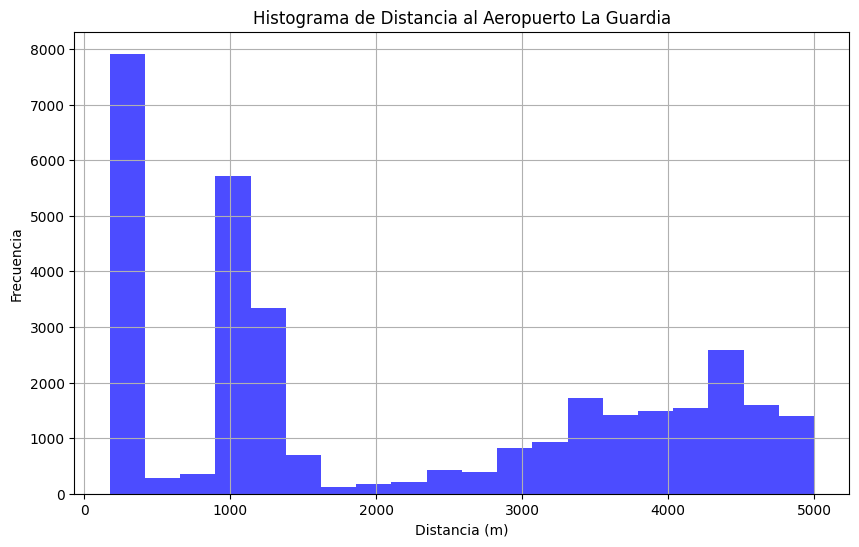

In [6]:

# Crear el histograma usando la columna 'Distance'
plt.figure(figsize=(10,6))
data['Distance'].hist(bins=20,color='blue', alpha=0.7)
plt.title('Histograma de Distancia al Aeropuerto La Guardia')
plt.xlabel('Distancia (m)')
plt.ylabel('Frecuencia')
plt.show()


### 2. Filtre el dataset para usar los viajes en un radio de 2000 mts. Use este dataset para el
resto de la pregunta.

In [7]:
# Filtra los datos para conservar solo aquellos viajes dentro de un radio de 2000 metros
datos_filtrados = data[data['Distance'] <= 2000]

datos_filtrados.head()


,Date/Time,Lat,Lon,Base,Distance
3,8/1/2014 8:12:00,40.7685,-73.8624,B02512,1353.032831
4,8/1/2014 8:57:00,40.7739,-73.8718,B02512,381.999066
7,8/1/2014 11:08:00,40.7701,-73.8667,B02512,975.566339
8,8/1/2014 11:08:00,40.7684,-73.8622,B02512,1372.917537
9,8/1/2014 11:47:00,40.7740,-73.8726,B02512,343.723009


### 3. Construya un nuevo dataset que calcule el número de viajes realizados en periodos de una hora y genere un gráfico de serie de tiempo. En base al gráfico, identifique que tipo de estacionalidades son relevantes para modelar esta serie de tiempo.

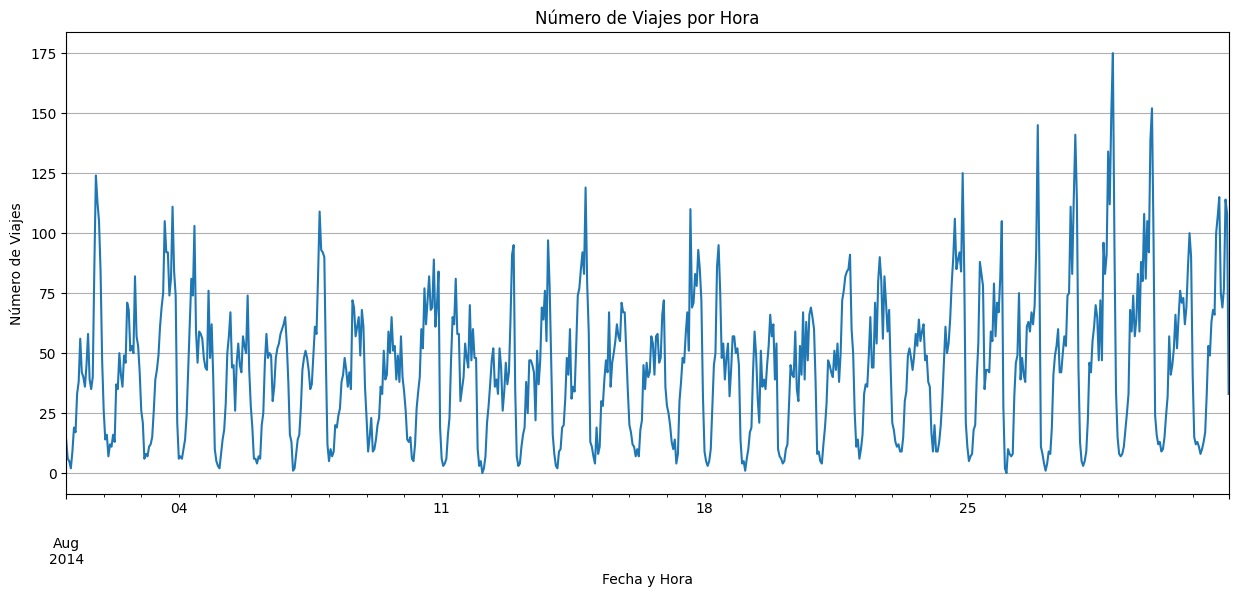

In [8]:
# Convertir la columna 'Date/Time' a formato datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Agrupar los datos por hora y contar los viajes
viajes_por_hora = data.resample('H', on='Date/Time').size()

import pandas as pd
import matplotlib.pyplot as plt



# Crear un gráfico de serie de tiempo
plt.figure(figsize=(15, 6))
viajes_por_hora.plot()
plt.title('Número de Viajes por Hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Viajes')
plt.grid(True)
plt.show()


Al observar el gráfico se pueden observar distintas estacionalidades, las que se describen a continuación:


**Estacionalidad Diaria**: Se pueden observar patrones diarios, como horas puntas durante las mañanas y tardes, y una disminución durante las horas nocturnas.

**Estacionalidad Semanal**: También es posible identificar patrones semanales, como un incremento o disminución de viajes durante los fines de semana comparado con los días laborales.

**Estacionalidad Mensual o Estacional**: Aunque el conjunto de datos parece ser solo para un mes, si se dispone de datos a lo largo de varios meses, podrían surgir patrones estacionales relacionados con eventos específicos del año o cambios estacionales.

En el sigiente pasó descomponemos las distintas estacionalidades para tener una visión más detallada.

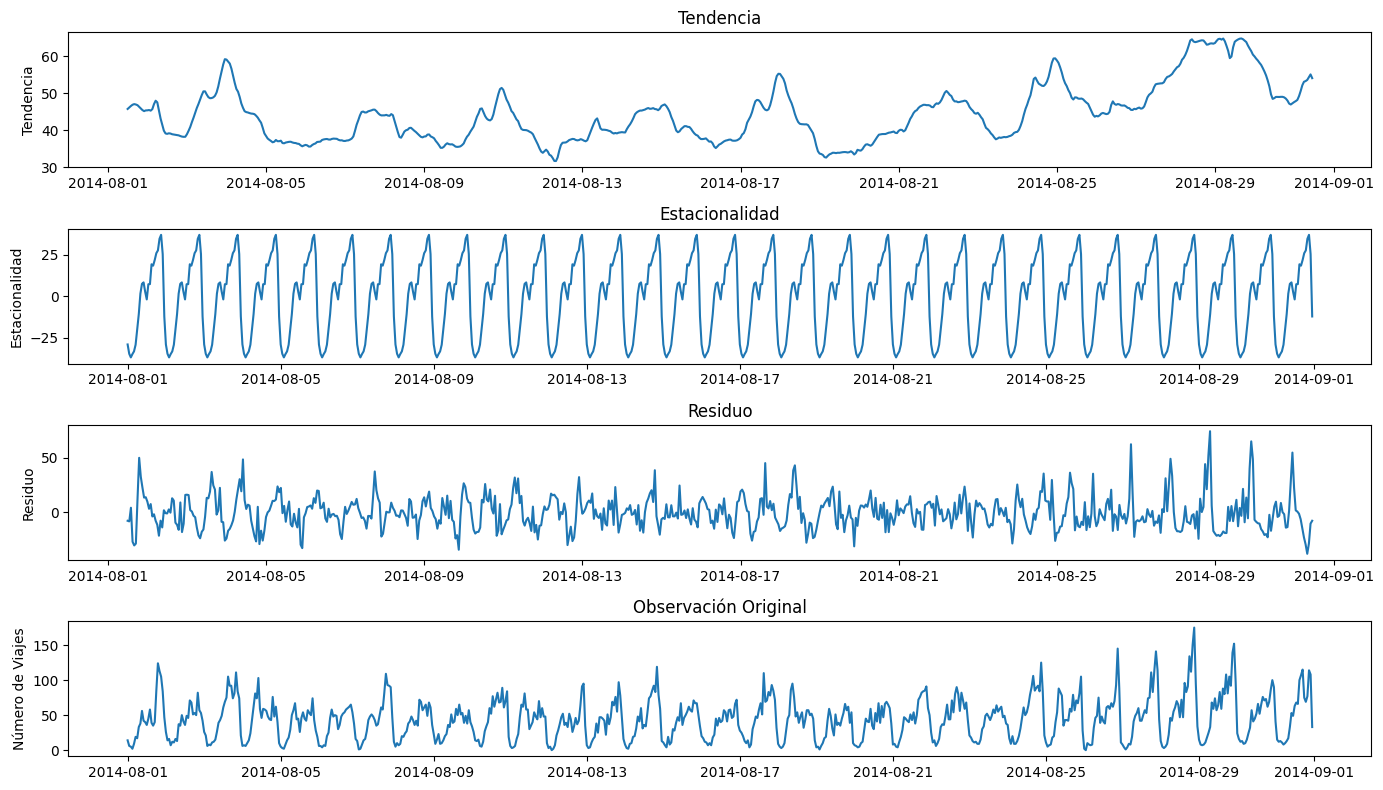

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
decomposition = seasonal_decompose(viajes_por_hora, model='additive')

# Creación de gráficos para las componentes de la descomposición
plt.figure(figsize=(14,8))

# Tendencia
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Tendencia')
plt.ylabel('Tendencia')

# Estacionalidad
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Estacionalidad')
plt.ylabel('Estacionalidad')

# Residuo
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residuo')
plt.ylabel('Residuo')

# Observación original
plt.subplot(414)
plt.plot(viajes_por_hora)
plt.title('Observación Original')
plt.ylabel('Número de Viajes')

plt.tight_layout()
plt.show()

Al descomponer las estacionalidades podemos ver más detalles de la serie de tiempo, los que se explican a continuación:

Tendencia: Muestra los patrones a largo plazo en el número de viajes. Esta gráfica ayuda a identificar si hay un aumento o disminución general en la demanda a lo largo del tiempo. Se puede observar que habría un leve aumento a finales de agosto de 2014, lo que se podría explicar or el fin de las vaciones y el regreso, desde y hacia, los hogares por vía aerea.

Estacionalidad: Ilustra los patrones regulares y periódicos en los datos. Esta gráfica es útil para ver los ciclos repetitivos, como las variaciones diarias o semanales en el número de viajes. Al observar la data, se puede concluir que existe un patron regular en los viajes diarias hacia el aeropuerto.

Residuo: Representa la parte de la serie temporal que no es explicada por la tendencia ni la estacionalidad. Esencialmente, es el "ruido" o la variabilidad aleatoria en los datos.

Observación Original: Es la serie temporal original sin descomponer.


En general, el aumento de la tendencia y el ruido, se pueden ver afectadas por eventos especiales, el final del verano boreal, condiciones particulares de tráfico y otros eventos específicos ocurridos sobre la pplataforma de UBER.

### 4. Construya un modelo de serie de tiempo para este dataset que permite a Uber predecir el número de viajes durante la próxima hora en esta zona.

In [10]:
# Ejecutar auto_arima para encontrar los mejores parámetros
# Establecer un rango razonable para p, d, q y para P, D, Q con m=24 (asumiendo una estacionalidad diaria)
# p indica el número términos autorregresivos
# d indica el número de diferenciaciones
# q indica el número de términos de media móvil
auto_model = auto_arima(viajes_por_hora, seasonal=True, m=24, trace=True,
                        error_action='ignore', suppress_warnings=True)

# Imprimir el resumen del modelo
print(auto_model.summary())

# Usar el modelo para hacer predicciones
predictions_auto = auto_model.predict(n_periods=24)

# Ajustar valores negativos a cero
predictions_auto = np.maximum(predictions_auto, 0)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=35.38 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=6387.756, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=6250.097, Time=2.99 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=6318.881, Time=2.96 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=6385.757, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=6388.928, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=6173.870, Time=11.33 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=20.82 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=3.46 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=6214.798, Time=8.54 sec
 ARIMA(2,1,0)(2,0,0)[24] intercept   : AIC=6174.534, Time=9.85 sec
 ARIMA(1,1,1)(2,0,0)[24] intercept   : AIC=inf, Time=32.50 sec
 ARIMA(0,1,1)(2,0,0)[24] intercept   : AIC=6171.520, Time=8.62 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=6249.304, Time=2.81 sec
 ARIMA(0,1,1)(2,0,1)[24] intercept 

La librería pdmarima, permite biscar el mejor modelo que se ajusta a la serie de tiempo. Siguiendo su librería implementamos la función, ajustamos los hiperparámetros y obtuvimos el siguiente resultado.

El modelo identificado como "ARIMA(0,1,1)(2,0,0)[24]" en pmdarima es un modelo ARIMA estacional. Este modelo se compone de dos partes: la especificación ARIMA no estacional y la especificación ARIMA estacional. Vamos a desglosar cada parte del modelo:

ARIMA(0,1,1): Esta es la parte no estacional del modelo.

* 0: Indica que el modelo no utiliza componentes autoregresivos (AR). El término AR se refiere a la relación entre una observación y un número de observaciones retrasadas.
* 1: Significa que se utiliza la diferenciación de primer orden. Esto es para hacer la serie temporal estacionaria, es decir, para estabilizar la media de la serie a lo largo del tiempo.
* 1: Indica que se utiliza un término de medias móviles (MA) de primer orden. El término MA se utiliza para explicar el error en la predicción de la serie temporal como una combinación lineal de los errores de predicción pasados.


(2,0,0)[24]: Esta es la parte estacional del modelo.

* 2: Se utilizan dos términos autoregresivos estacionales. Esto indica una relación con las observaciones en las mismas estaciones o períodos en el pasado.
* 0: No se utiliza la diferenciación estacional.
* 0: No se utilizan términos de medias móviles estacionales.
* [24]: Esto indica que el modelo considera la estacionalidad con un periodo de 24. En el contexto de los datos horarios, esto sugiere una estacionalidad diaria, ya que hay 24 horas en un día.


En resumen, este modelo ARIMA(0,1,1)(2,0,0)[24] sugiere que la mejor manera de predecir el número de viajes en una hora dada es considerar la diferencia entre el número de viajes en horas consecutivas y la relación de esta diferencia con las diferencias observadas a la misma hora en días anteriores, hasta dos días atrás. No utiliza términos de medias móviles estacionales y considera que los patrones se repiten cada 24 horas.

In [11]:
# Imprimir las predicciones para las próximas 24 horas
print(predictions_auto)


2014-09-01 00:00:00     7.161530
2014-09-01 01:00:00     0.000000
2014-09-01 02:00:00     0.000000
2014-09-01 03:00:00     0.000000
2014-09-01 04:00:00     0.000000
2014-09-01 05:00:00     0.000000
2014-09-01 06:00:00     0.000000
2014-09-01 07:00:00     0.000000
2014-09-01 08:00:00     1.533270
2014-09-01 09:00:00    15.482950
2014-09-01 10:00:00    17.035472
2014-09-01 11:00:00    16.993913
2014-09-01 12:00:00    24.199183
2014-09-01 13:00:00    30.638581
2014-09-01 14:00:00    25.238897
2014-09-01 15:00:00    41.392682
2014-09-01 16:00:00    47.516678
2014-09-01 17:00:00    48.608342
2014-09-01 18:00:00    35.417851
2014-09-01 19:00:00    29.640426
2014-09-01 20:00:00    34.766267
2014-09-01 21:00:00    53.304493
2014-09-01 22:00:00    55.931606
2014-09-01 23:00:00    26.576940
Freq: H, dtype: float64


Se observa que el mayor número de viajes, de acuerdo a los datos, se espera entre las 8 PM y las 10 PM, seguido del rango horario entre 3  PM y la 5 PM.

Se espera tener mayor demanda en hrario PM en dirección hacia La Guardia.

### 5. Muestre un gráfico de serie de tiempo que permita visualizar la predicción y valores reales de número de pasajeros

Primero juntamos los dataframe y luego construimos el gráfico

In [12]:
# Extraer las estimaciones del modelo para todo el período
# En este caso, estamos obteniendo las estimaciones in-sample
estimaciones = auto_model.predict_in_sample()

# Crear un DataFrame que combine los valores reales y las estimaciones
df_combinado = pd.DataFrame({
    'Reales': viajes_por_hora,
    'Estimacion': estimaciones
}, index=viajes_por_hora.index)

# Ahora 'df_combinado' contiene tanto los valores reales como las estimaciones del modelo


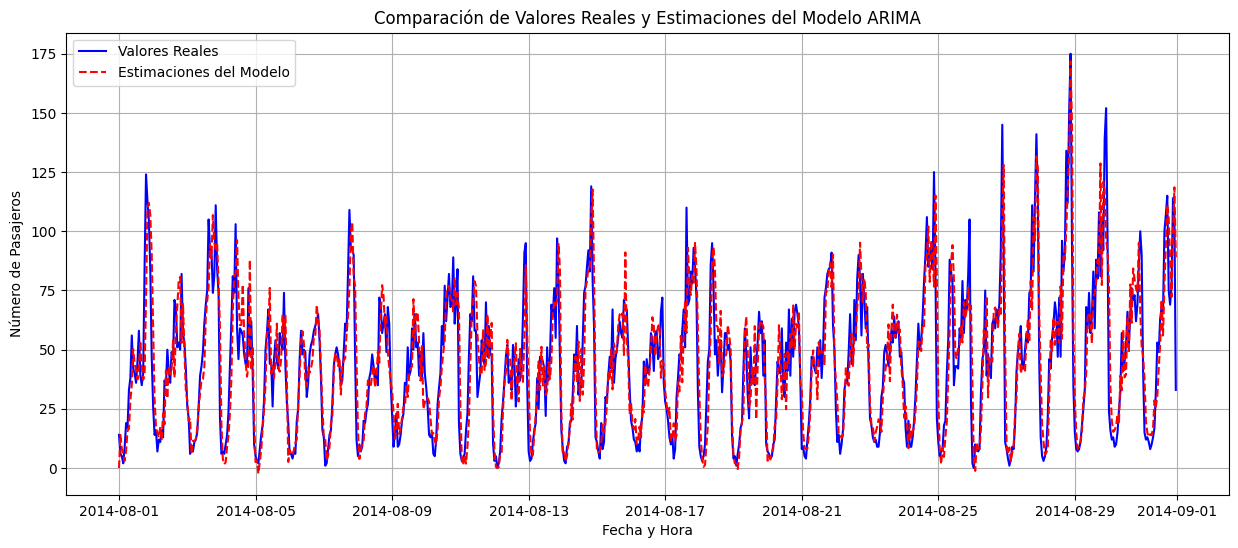

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Gráfico de serie de tiempo de valores reales vs estimaciones
plt.figure(figsize=(15, 6))
plt.plot(df_combinado.index, df_combinado['Reales'], label='Valores Reales', color='blue')  # Valores reales
plt.plot(df_combinado.index, df_combinado['Estimacion'], label='Estimaciones del Modelo', color='red', linestyle='--')  # Estimaciones
plt.title('Comparación de Valores Reales y Estimaciones del Modelo ARIMA')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Pasajeros')
plt.legend()
plt.grid(True)
plt.show()


### 6. Calcule el Root Mean Square Error de la predicción. Calcule el indicador de forma separada para las predicciones entre 7am-10pm y entre 10:01pm y 6:59am.





In [14]:
def calcular_rmse(valores_reales, valores_estimados):
    return sqrt(mean_squared_error(valores_reales, valores_estimados))

# Calcular el RMSE para el período total
rmse_total = calcular_rmse(df_combinado['Reales'], df_combinado['Estimacion'])

# Convertir el índice de df_combinado a datetime para poder filtrar por hora
df_combinado.index = pd.to_datetime(df_combinado.index)

# Filtrar los datos por tiempo
datos_diurnos = df_combinado.between_time('07:00', '22:00')
datos_nocturnos = df_combinado.between_time('22:01', '06:59')

# Calcular RMSE para cada segmento de tiempo
rmse_diurno = calcular_rmse(datos_diurnos['Reales'], datos_diurnos['Estimacion'])
rmse_nocturno = calcular_rmse(datos_nocturnos['Reales'], datos_nocturnos['Estimacion'])

print("RMSE Total:", rmse_total)
print("RMSE Diurno (7am-10pm):", rmse_diurno)
print("RMSE Nocturno (10:01pm-6:59am):", rmse_nocturno)


RMSE Total: 15.340627307708694
RMSE Diurno (7am-10pm): 16.26293275590506
RMSE Nocturno (10:01pm-6:59am): 13.305584351537282


En promedio, existe más error de rpedicción en el horario diurno que en el horario nocturno.

## Parte 2

En lo que resta de la pregunta, resolveremos el problema de matching. Para el análisis
usaremos solo el día 6 de agosto entre las 7am y las 10pm (ultimo bloque es 9-10pm).

Uber se planifica para tener disponible un numero de autos al comienzo de cada bloque horario
listos para asignar a pasajeros. La cantidad de autos esta dada por la predicción de su modelo
de serie de tiempo. Por ejemplo, si el 6 de agosto a las 5pm el modelo predice 43.84 viajes,
Uber tendrá listo 44 autos a las 5pm. La ubicación de estos autos es random en el mapa, pero
siempre dentro de un radio de 2km alrededor del centro del aeropuerto.

La siguiente función entrega una localización al azar dentro de un radio alrededor del punto
dado por lat,lon.

In [15]:
import random
import math

def random_point_in_circle(radius, lat, lon):
    # Convert radius from meters to degrees (approximately)
    radius_in_degrees = radius / 111320

    # Generate random angle and radius
    theta = random.uniform(0, 2 * math.pi)
    r = radius_in_degrees * math.sqrt(random.uniform(0, 1))

    # Calculate the new latitude and longitude
    new_lat = lat + r * math.cos(theta)
    new_lon = lon + r * math.sin(theta)
    return new_lat, new_lon

# Coordenadas del aeropuerto La Guardia
lat_laguardia = 40.7769
lon_laguardia = -73.8740

# Ejemplo de uso: Generar una ubicación aleatoria dentro de un radio de 2km alrededor del aeropuerto
random_lat, random_lon = random_point_in_circle(2000, lat_laguardia, lon_laguardia)
print(random_lat, random_lon)


40.79135248996273 -73.871758461309


Las coordenadas (latitud,longitud) del aeropuerto La Guardia son: 40.7769, -73.8740

###7. Programa una asignación que asigna cada pasajero entrante al vehículo más cercano disponible (heurística greedy).

Condiciones: una vez asignado, el vehículo desaparece. Si ya no quedan vehículos disponibles, el pasajero no es asignado.

Calcule la distancia promedio para todos los pasajeros asignados y el porcentaje de pasajeros que no pudo ser asignado.

Para realizar la asignación de pasajeros a vehículos más cercanos utilizando una heurística greedy y calcular la distancia promedio para los pasajeros asignados y el porcentaje de pasajeros no asignados,se hace la siguiente simulación:

* Generar Ubicaciones de Vehículos: Usando la función random_point_in_circle para cada vehículo basándonos en el número de vehículos predicho.

* Asignar Pasajeros a Vehículos: Para cada pasajero, encontraremos el vehículo más cercano y lo asignaremos. Si no hay vehículos disponibles, el pasajero no será asignado.

* Calcular Distancia Promedio y Porcentaje de No Asignación: Después de realizar todas las asignaciones, calcularemos la distancia promedio de los pasajeros asignados y el porcentaje de pasajeros que no pudieron ser asignados.

Implementemos la función para generar las ubicaciones de los vehículos y luego la lógica para la asignación de pasajeros, donde los vehículos son los valores estimados y el número de pasajeros son el número real de vehículos en el dataset.

In [16]:
# Supongamos que 'df_combinado' ya está definido y contiene las columnas 'Reales' y 'Estimacion'
df_combinado.index = pd.to_datetime(df_combinado.index)
df_6_agosto = df_combinado[df_combinado.index.date == pd.to_datetime('2014-08-06').date()]

# Filtrar solo las horas entre las 7am y las 10pm
df_6_agosto = df_6_agosto.between_time('07:00', '21:00')

# Resultados de la simulación
resultados_simulacion = {}

for hora, fila in df_6_agosto.iterrows():
    num_vehiculos = int(np.ceil(fila['Estimacion']))
    num_pasajeros = int(fila['Reales'])

    vehiculos = [random_point_in_circle(2000, lat_laguardia, lon_laguardia) for _ in range(num_vehiculos)]

    distancias_asignadas = []
    pasajeros_no_asignados = 0

    for _ in range(num_pasajeros):
        if not vehiculos:
            pasajeros_no_asignados += 1
            continue

        pasajero_lat, pasajero_lon = random_point_in_circle(2000, lat_laguardia, lon_laguardia)
        distancias = [great_circle((pasajero_lat, pasajero_lon), vehiculo).meters for vehiculo in vehiculos]
        vehiculo_mas_cercano_idx = np.argmin(distancias)

        distancias_asignadas.append(distancias[vehiculo_mas_cercano_idx])
        del vehiculos[vehiculo_mas_cercano_idx]

    distancia_promedio = np.mean(distancias_asignadas) if distancias_asignadas else 0
    porcentaje_no_asignados = (pasajeros_no_asignados / num_pasajeros) * 100 if num_pasajeros > 0 else 100

    hora_formato = hora.strftime('%H:%M')
    resultados_simulacion[hora_formato] = {
        "Distancia Promedio (metros)": distancia_promedio,
        "Porcentaje No Asignados": porcentaje_no_asignados
    }

#Imprimir los resultados de la simulación
for hora, resultado in resultados_simulacion.items():
  print(f"Hora: {hora}")
  print(f"Distancia Promedio (metros): {resultado['Distancia Promedio (metros)']}")
  print(f"Porcentaje No Asignados: {resultado['Porcentaje No Asignados']}%")
  print("-" * 30) # Separador para cada hora

Hora: 07:00
Distancia Promedio (metros): 794.7150945411543
Porcentaje No Asignados: 13.043478260869565%
------------------------------
Hora: 08:00
Distancia Promedio (metros): 653.9331267832176
Porcentaje No Asignados: 6.896551724137931%
------------------------------
Hora: 09:00
Distancia Promedio (metros): 384.11446229769535
Porcentaje No Asignados: 0.0%
------------------------------
Hora: 10:00
Distancia Promedio (metros): 365.2578415893075
Porcentaje No Asignados: 0.0%
------------------------------
Hora: 11:00
Distancia Promedio (metros): 541.012488004485
Porcentaje No Asignados: 24.489795918367346%
------------------------------
Hora: 12:00
Distancia Promedio (metros): 478.38165372934975
Porcentaje No Asignados: 0.0%
------------------------------
Hora: 13:00
Distancia Promedio (metros): 425.25789618123525
Porcentaje No Asignados: 0.0%
------------------------------
Hora: 14:00
Distancia Promedio (metros): 427.2848919421172
Porcentaje No Asignados: 14.583333333333334%
----------

8. Explique: (i) como se podría realizar una asignación más eficiente que la heurística
greedy utilizada en la pregunta anterior? ; (ii) que cambios haría en esta simulación para
hacerlo más realista? (e.g. es realista que lo autos estén todos disponibles al comienzo
de cada hora? Que se ubiquen al azar alrededor del aeropuerto? ). No es necesario que
cambie la simulación, solo argumente como podría ser mejorada.

Para mejorar la asignación de vehículos a pasajeros y hacer la simulación más realista, se podría implementar un método de optimización global, como la programación lineal, en lugar de la heurística greedy, permitiendo una asignación más eficiente basada en minimizar la distancia total o el tiempo de viaje. Además, el uso de aprendizaje automático para predecir la demanda de viajes y ajustar la asignación de vehículos en tiempo real, junto con sistemas de recomendación para sugerir ubicaciones estratégicas a los conductores, podría aumentar la eficiencia. Para mayor realismo, se debería considerar la disponibilidad dinámica de vehículos, teniendo en cuenta factores como la duración de viajes anteriores y el mantenimiento, así como ubicaciones basadas en la demanda histórica y patrones de tráfico, en lugar de posiciones aleatorias. También es crucial introducir variabilidad en la demanda de pasajeros y considerar factores externos como el clima y eventos locales. Incorporar estimaciones realistas de tiempos de viaje que afecten la disponibilidad futura de los vehículos haría la simulación más precisa y alineada con las operaciones reales de un servicio de transporte por demanda.

#### (i) Asignación más eficiente que la heurística greedy:

La heurística greedy asigna cada pasajero al vehículo más cercano disponible en ese momento, sin considerar las asignaciones futuras. Si bien es simple y rápida, puede no ser óptima en el largo plazo. Revisando los apuntes y la literatura, se puede mencionar las sigueientes mejoras a la estimación:

**Optimización basada en el problema del agente viajero (TSP)**: En lugar de asignar pasajeros a vehículos uno por uno, se podría considerar el conjunto de asignaciones como un todo, similar al TSP, donde el objetivo es minimizar la distancia total recorrida por todos los vehículos. Esto requere un enfoque de optimización más complejo, pero podría resultar en un uso más eficiente de los vehículos.

**Heurísticas mejoradas**: Se podrían usar algoritmos que miren un poco más allá del siguiente pasajero a asignar. Por ejemplo, una heurística que considere los próximos dos o tres pasajeros y sus ubicaciones al realizar cada asignación, aunque esto incrementaría la complejidad computacional.

**Algoritmos de aprendizaje automático y optimización predictiva**: Utilizar modelos predictivos que puedan estimar la demanda futura en diferentes zonas y en diferentes momentos, permitiendo una asignación de vehículos basada en predicciones de demanda más que en reacciones a demandas inmediatas.

#### (ii) Cambios para hacer la simulación más realista:

**Disponibilidad de Vehículos a lo Largo del Tiempo**: En lugar de tener todos los autos disponibles al comienzo de cada hora, se podría modelar la disponibilidad de vehículos de manera más dinámica, teniendo en cuenta que algunos vehículos pueden estar en medio de viajes cuando comienza un nuevo bloque horario.

**Ubicación de Vehículos basada en Patrones de Tráfico y Demanda**: La ubicación aleatoria de vehículos alrededor del aeropuerto podría no ser realista. En la práctica, la distribución de vehículos estaría probablemente influenciada por patrones de tráfico, zonas de alta demanda, y posiblemente la ubicación de los viajes anteriores.

**Consideración de Factores Externos**: Factores como el tráfico, el clima, y eventos especiales pueden influir significativamente en la disponibilidad y la demanda de vehículos. Incorporar estos factores podría hacer que la simulación sea más representativa de las condiciones reales.

**Tiempo de Viaje y Espera**: La simulación podría incorporar un modelo de tiempo de viaje y espera, considerando la distancia entre el vehículo y el pasajero, así como el tiempo que tarda el vehículo en llegar al destino.

**Comportamiento del Conductor**: Considerar las decisiones de los conductores, como rechazar viajes, tomar descansos, o preferir ciertas áreas, también podría añadir realismo a la simulación.

En síntesis, aunque la heurística greedy proporciona un punto de partida simple y efectivo para el problema de asignación, hay varias maneras de mejorar la eficiencia y el realismo de la simulación mediante la adopción de enfoques de optimización más avanzados y considerando una gama más amplia de factores dinámicos y contextuales.